📦 STEP 0: IMPORTING LIBRARIES...
✓ All libraries imported successfully!

📂 STEP 1: DATA LOADING

📁 Attempting to load dataset from:
   D:\Kuliah\Skripsi\Scraping\Balancing\Oversampling\Validator\hasil_validator_final.csv

✓ Dataset loaded successfully!
   Shape: (1663, 3)
   Columns: ['ulasan_mentah', 'processed_text', 'hasil_validator']

🔍 CHECKING DATASET COLUMNS...

⚠️  Required columns not found: ['text', 'sentiment']
   Available columns: ['ulasan_mentah', 'processed_text', 'hasil_validator']
   ✓ Renamed 'processed_text' → 'text'
   ✓ Renamed 'hasil_validator' → 'sentiment'

📋 DATASET PREVIEW:
                                       ulasan_mentah  \
0  Saya kecewa sudah nunggu lebih dari 1 jam tern...   
1  Kecewaaaa buangeeett ke sini, baru pertama kal...   
2  Saya beli hp katanya ada mulai sebelum maghrib...   
3                    Pelayanan ramah dan baik sekali   
4  Punya pengalaman beli iPhone yang cukup mengec...   
5  Pelayanan okey, gercep, mbak"nya ramah dan mem...   
6

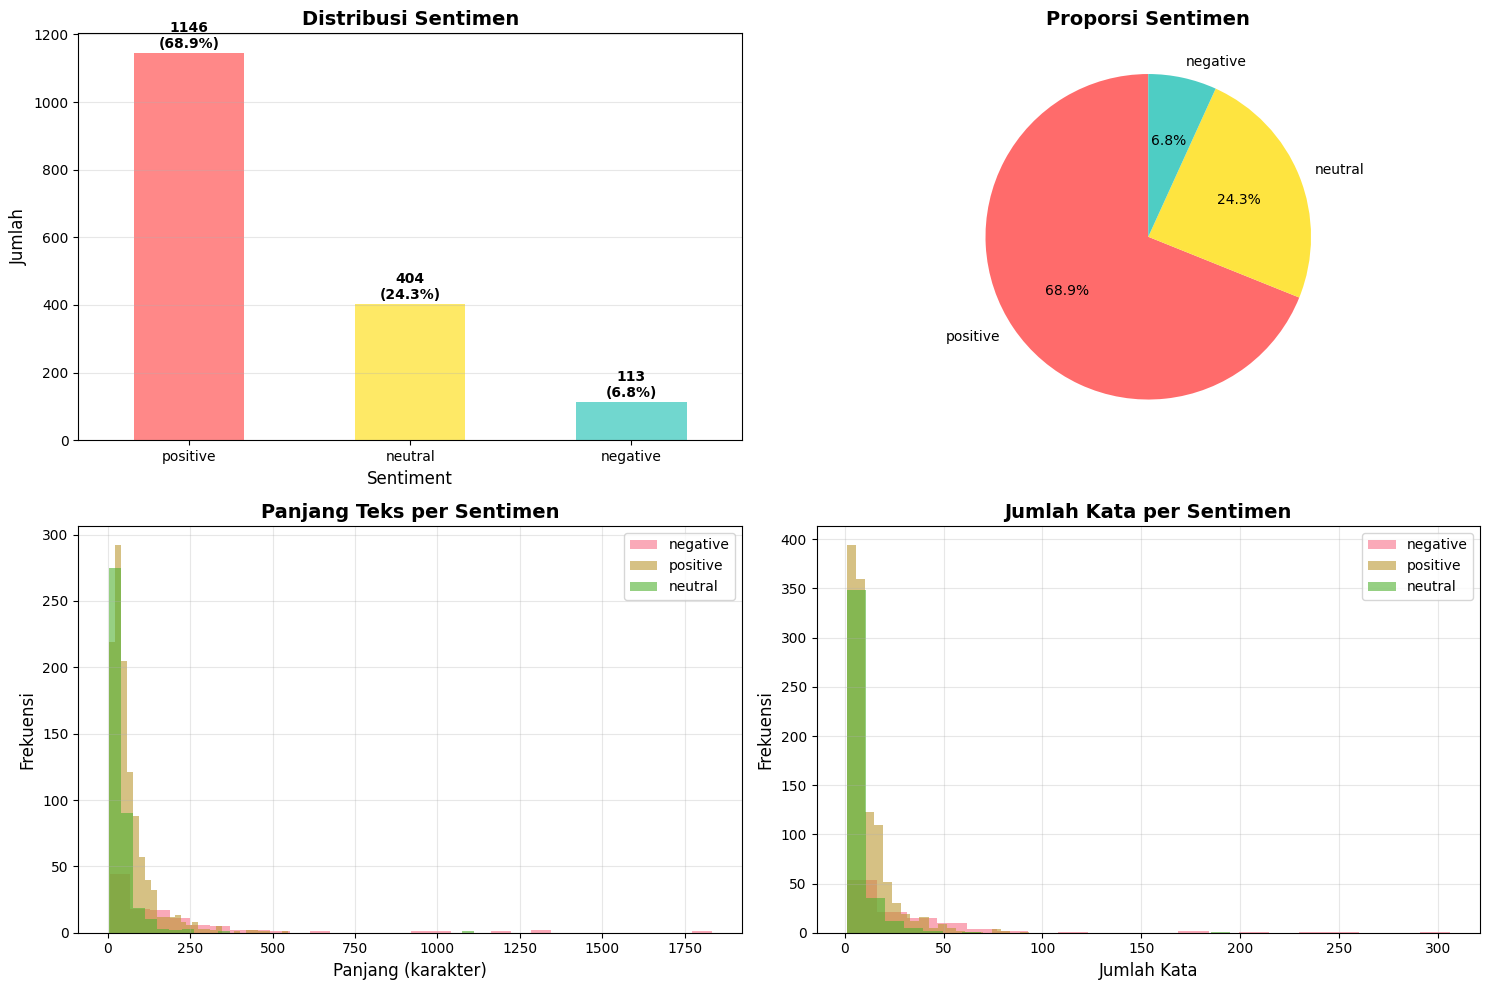


🗑️ STEP 3: REMOVING NEUTRAL DATA

📊 DATA BEFORE REMOVING NEUTRAL:
   Total samples: 1663
   positive  : 1146 (68.9%)
   neutral   :  404 (24.3%)
   negative  :  113 (6.8%)

🗑️ REMOVING NEUTRAL DATA...
   Removed: 404 neutral samples

📊 DATA AFTER REMOVING NEUTRAL:
   Total samples: 1259
   positive  : 1146 (91.0%)
   negative  :  113 (9.0%)

   New Imbalance Ratio: 10.14:1

✓ Neutral data removed successfully!
   Final dataset: 1259 samples (positive & negative only)

🔧 STEP 4: PREPARING DATA

✓ Features (X): 1259 samples
✓ Target (y): 1259 samples

✂️ STEP 5: TRAIN-TEST SPLIT

📊 SPLIT RESULTS:
   Training: 1007 (80.0%)
   Test: 252 (20.0%)

📊 TRAINING DISTRIBUTION:
   negative  :   90 (8.9%)
   positive  :  917 (91.1%)

📊 TEST DISTRIBUTION:
   negative  :   23 (9.1%)
   positive  :  229 (90.9%)

🔢 STEP 6: TF-IDF VECTORIZATION

⏳ Fitting TF-IDF...

✓ TF-IDF COMPLETED:
   Vocabulary: 1000
   Features: 1000
   Train matrix: (1007, 1000)
   Test matrix: (252, 1000)

⚖️ STEP 7: CLASS BALA

In [1]:
"""
=============================================================================
SENTIMENT ANALYSIS - TIGA PUTRA VALIDATOR DATASET
Dataset sudah dilakukan preprocessing dan labelling
=============================================================================
CARA PAKAI:
1. Update PATH DATASET di bawah
2. Run ALL cells (Kernel -> Restart & Run All)
   ATAU
   Run sebagai Python script: python tiga_putra_validasi.py
=============================================================================
"""

# =============================================================================
# STEP 0: IMPORT LIBRARIES
# =============================================================================
print("="*80)
print("📦 STEP 0: IMPORTING LIBRARIES...")
print("="*80)

try:
    # Standard libraries
    import pandas as pd
    import numpy as np
    import os
    import warnings
    from datetime import datetime
    from collections import Counter
    warnings.filterwarnings('ignore')
    
    # Visualization libraries
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Machine Learning libraries
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.svm import SVC
    from sklearn.metrics import (
        classification_report, accuracy_score, precision_score,
        recall_score, f1_score, confusion_matrix
    )
    from imblearn.over_sampling import RandomOverSampler
    
    # Model saving
    import joblib
    import json
    
    # Set visualization style
    plt.style.use('default')
    sns.set_palette("husl")
    
    print("✓ All libraries imported successfully!")
    
except ImportError as e:
    print(f"❌ ERROR: Missing required library!")
    print(f"   {e}")
    print(f"\n💡 Install missing libraries:")
    print(f"   pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn joblib")
    raise

print("="*80)

# =============================================================================
# STEP 1: DATA LOADING
# =============================================================================
print("\n" + "="*80)
print("📂 STEP 1: DATA LOADING")
print("="*80)

# ============================================
# 🔧 UPDATE PATH DATASET ANDA DI SINI! 🔧
# ============================================
file_path = "D:\\Kuliah\\Skripsi\\Scraping\\Balancing\\Oversampling\\Validator\\hasil_validator_final.csv"


print(f"\n📁 Attempting to load dataset from:")
print(f"   {file_path}")

# Initialize df as None
df = None

try:
    # Load dataset
    df = pd.read_csv(file_path, sep=';', encoding='utf-8')
    print(f"\n✓ Dataset loaded successfully!")
    print(f"   Shape: {df.shape}")
    print(f"   Columns: {list(df.columns)}")
    
except FileNotFoundError:
    print(f"\n❌ ERROR: File not found!")
    print(f"   Path: {file_path}")
    print(f"\n💡 TROUBLESHOOTING:")
    print(f"   1. Check if file exists at that location")
    print(f"   2. Update 'file_path' variable above")
    print(f"   3. Use raw string: r'C:\\path\\to\\file.csv'")
    print(f"   4. Or forward slash: 'C:/path/to/file.csv'")
    raise
    
except Exception as e:
    print(f"\n❌ ERROR loading dataset: {e}")
    print(f"\n💡 TIP: Check if file is CSV with semicolon delimiter")
    raise

# Verify df is loaded
if df is None:
    raise ValueError("Dataset (df) is None! Check data loading step.")

# Verify columns
print(f"\n🔍 CHECKING DATASET COLUMNS...")
required_columns = ['text', 'sentiment']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"\n⚠️  Required columns not found: {missing_columns}")
    print(f"   Available columns: {list(df.columns)}")
    
    # Try to rename common alternatives
    renamed = False
    
    if 'processed_text' in df.columns and 'text' not in df.columns:
        df.rename(columns={'processed_text': 'text'}, inplace=True)
        print(f"   ✓ Renamed 'processed_text' → 'text'")
        renamed = True
    
    if 'hasil_validator' in df.columns and 'sentiment' not in df.columns:
        df.rename(columns={'hasil_validator': 'sentiment'}, inplace=True)
        print(f"   ✓ Renamed 'hasil_validator' → 'sentiment'")
        renamed = True
    
    if not renamed:
        print(f"\n❌ ERROR: Cannot find required columns!")
        print(f"   Required: {required_columns}")
        print(f"   Found: {list(df.columns)}")
        raise ValueError("Dataset must have 'text' and 'sentiment' columns")
else:
    print(f"   ✓ All required columns present: {required_columns}")

# Preview dataset
print(f"\n📋 DATASET PREVIEW:")
print("="*80)
print(df.head(10))

# =============================================================================
# STEP 2: EXPLORATORY DATA ANALYSIS
# =============================================================================
print("\n" + "="*80)
print("📊 STEP 2: EXPLORATORY DATA ANALYSIS")
print("="*80)

# Basic info
print(f"\n📈 DATASET INFORMATION:")
print(f"   Total Samples: {len(df)}")
print(f"   Total Columns: {len(df.columns)}")
print(f"   Columns: {list(df.columns)}")

# Missing values
print(f"\n🔍 MISSING VALUES CHECK:")
missing_values = df.isnull().sum()
total_missing = missing_values.sum()

if total_missing > 0:
    print(f"   ⚠️  Found {total_missing} missing values:")
    for col, missing in missing_values.items():
        if missing > 0:
            print(f"      {col}: {missing} ({missing/len(df)*100:.1f}%)")
    
    # Remove missing values
    df = df.dropna()
    print(f"   ✓ Removed missing values. New size: {len(df)}")
else:
    print(f"   ✓ No missing values found")

# Empty text check
empty_text = df[df['text'].str.strip() == ''].shape[0]
if empty_text > 0:
    print(f"\n   ⚠️  Found {empty_text} empty text rows")
    df = df[df['text'].str.strip() != '']
    print(f"   ✓ Removed empty rows. New size: {len(df)}")

# Sentiment distribution
print(f"\n📊 SENTIMENT DISTRIBUTION:")
print("="*80)
sentiment_counts = df['sentiment'].value_counts()

for sentiment, count in sentiment_counts.items():
    percentage = (count/len(df))*100
    bar = '█' * int(percentage/2)
    print(f"   {sentiment:10s}: {count:4d} ({percentage:5.1f}%) {bar}")

# Imbalance ratio
max_class = sentiment_counts.max()
min_class = sentiment_counts.min()
imbalance_ratio = max_class / min_class
print(f"\n   Imbalance Ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 3:
    print(f"   ⚠️  Dataset imbalanced!")
else:
    print(f"   ✓ Dataset relatively balanced")

# Text statistics
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

print(f"\n📏 TEXT STATISTICS:")
print(f"   Text Length - Mean: {df['text_length'].mean():.1f}, Median: {df['text_length'].median():.1f}")
print(f"   Word Count  - Mean: {df['word_count'].mean():.1f}, Median: {df['word_count'].median():.1f}")

# Visualization
print(f"\n📊 Creating EDA visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Bar Chart
ax1 = axes[0, 0]
sentiment_counts.plot(kind='bar', ax=ax1, color=['#FF6B6B', '#FEE440', '#4ECDC4'], alpha=0.8)
ax1.set_title('Distribusi Sentimen', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sentiment', fontsize=12)
ax1.set_ylabel('Jumlah', fontsize=12)
ax1.tick_params(axis='x', rotation=0)
ax1.grid(True, alpha=0.3, axis='y')

for i, (sentiment, count) in enumerate(sentiment_counts.items()):
    percentage = (count/len(df))*100
    ax1.text(i, count + 5, f'{count}\n({percentage:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')

# 2. Pie Chart
ax2 = axes[0, 1]
colors = ['#FF6B6B', '#FEE440', '#4ECDC4']
sentiment_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', 
                      colors=colors, startangle=90)
ax2.set_title('Proporsi Sentimen', fontsize=14, fontweight='bold')
ax2.set_ylabel('')

# 3. Text Length
ax3 = axes[1, 0]
for sentiment in df['sentiment'].unique():
    data = df[df['sentiment'] == sentiment]['text_length']
    ax3.hist(data, bins=30, alpha=0.6, label=sentiment)
ax3.set_title('Panjang Teks per Sentimen', fontsize=14, fontweight='bold')
ax3.set_xlabel('Panjang (karakter)', fontsize=12)
ax3.set_ylabel('Frekuensi', fontsize=12)
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Word Count
ax4 = axes[1, 1]
for sentiment in df['sentiment'].unique():
    data = df[df['sentiment'] == sentiment]['word_count']
    ax4.hist(data, bins=20, alpha=0.6, label=sentiment)
ax4.set_title('Jumlah Kata per Sentimen', fontsize=14, fontweight='bold')
ax4.set_xlabel('Jumlah Kata', fontsize=12)
ax4.set_ylabel('Frekuensi', fontsize=12)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('01_eda_validator.png', dpi=300, bbox_inches='tight')
print(f"✓ Saved: 01_eda_validator.png")
plt.show()

# =============================================================================
# STEP 3: REMOVE NEUTRAL DATA
# =============================================================================
print("\n" + "="*80)
print("🗑️ STEP 3: REMOVING NEUTRAL DATA")
print("="*80)

print(f"\n📊 DATA BEFORE REMOVING NEUTRAL:")
print(f"   Total samples: {len(df)}")
sentiment_before = df['sentiment'].value_counts()
for sentiment, count in sentiment_before.items():
    print(f"   {sentiment:10s}: {count:4d} ({count/len(df)*100:.1f}%)")

# Remove neutral data
df_filtered = df[df['sentiment'] != 'neutral'].copy()

print(f"\n🗑️ REMOVING NEUTRAL DATA...")
removed_count = len(df) - len(df_filtered)
print(f"   Removed: {removed_count} neutral samples")

print(f"\n📊 DATA AFTER REMOVING NEUTRAL:")
print(f"   Total samples: {len(df_filtered)}")
sentiment_after = df_filtered['sentiment'].value_counts()
for sentiment, count in sentiment_after.items():
    print(f"   {sentiment:10s}: {count:4d} ({count/len(df_filtered)*100:.1f}%)")

# Calculate new imbalance ratio
if len(sentiment_after) > 0:
    max_class_filtered = sentiment_after.max()
    min_class_filtered = sentiment_after.min()
    imbalance_ratio_filtered = max_class_filtered / min_class_filtered
    print(f"\n   New Imbalance Ratio: {imbalance_ratio_filtered:.2f}:1")

# Update df to filtered version
df = df_filtered

print(f"\n✓ Neutral data removed successfully!")
print(f"   Final dataset: {len(df)} samples (positive & negative only)")

# =============================================================================
# STEP 4: PREPARE DATA
# =============================================================================
print("\n" + "="*80)
print("🔧 STEP 4: PREPARING DATA")
print("="*80)

X = df['text'].tolist()
y = df['sentiment'].tolist()

print(f"\n✓ Features (X): {len(X)} samples")
print(f"✓ Target (y): {len(y)} samples")

# Verify
empty_texts = sum([1 for text in X if pd.isna(text) or str(text).strip() == ""])
if empty_texts > 0:
    print(f"\n⚠️  Found {empty_texts} empty texts, removing...")
    valid_indices = [i for i, text in enumerate(X) if not pd.isna(text) and str(text).strip() != ""]
    X = [X[i] for i in valid_indices]
    y = [y[i] for i in valid_indices]
    print(f"✓ Final: {len(X)} samples")

# =============================================================================
# STEP 5: TRAIN-TEST SPLIT
# =============================================================================
print("\n" + "="*80)
print("✂️ STEP 5: TRAIN-TEST SPLIT")
print("="*80)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📊 SPLIT RESULTS:")
print(f"   Training: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"   Test: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

train_dist = Counter(y_train)
test_dist = Counter(y_test)

print(f"\n📊 TRAINING DISTRIBUTION:")
for sentiment, count in sorted(train_dist.items()):
    print(f"   {sentiment:10s}: {count:4d} ({count/len(y_train)*100:.1f}%)")

print(f"\n📊 TEST DISTRIBUTION:")
for sentiment, count in sorted(test_dist.items()):
    print(f"   {sentiment:10s}: {count:4d} ({count/len(y_test)*100:.1f}%)")

# =============================================================================
# STEP 6: TF-IDF VECTORIZATION
# =============================================================================
print("\n" + "="*80)
print("🔢 STEP 6: TF-IDF VECTORIZATION")
print("="*80)

tfidf = TfidfVectorizer(
    max_features=1000,
    min_df=3,
    max_df=0.7,
    ngram_range=(1, 2),
    sublinear_tf=True,
    stop_words=None
)

print(f"\n⏳ Fitting TF-IDF...")
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"\n✓ TF-IDF COMPLETED:")
print(f"   Vocabulary: {len(tfidf.vocabulary_)}")
print(f"   Features: {X_train_tfidf.shape[1]}")
print(f"   Train matrix: {X_train_tfidf.shape}")
print(f"   Test matrix: {X_test_tfidf.shape}")

# =============================================================================
# STEP 7: CLASS BALANCING
# =============================================================================
print("\n" + "="*80)
print("⚖️ STEP 7: CLASS BALANCING")
print("="*80)

max_class = max(train_dist.values())
min_class = min(train_dist.values())
imbalance_ratio = max_class / min_class

print(f"\n📊 IMBALANCE ANALYSIS:")
print(f"   Max: {max_class}, Min: {min_class}")
print(f"   Ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 2.0:
    print(f"\n⏳ Applying RandomOverSampler...")
    
    ros = RandomOverSampler(random_state=42)
    X_train_tfidf, y_train = ros.fit_resample(X_train_tfidf, y_train)
    
    print(f"✓ OVERSAMPLING COMPLETED:")
    print(f"   New size: {len(y_train)}")
    
    balanced_dist = Counter(y_train)
    print(f"\n📊 BALANCED DISTRIBUTION:")
    for sentiment, count in sorted(balanced_dist.items()):
        original = train_dist.get(sentiment, 0)
        print(f"   {sentiment:10s}: {count:4d} [was {original}]")
else:
    print(f"\n✓ No oversampling needed")

# =============================================================================
# STEP 8: MODEL TRAINING
# =============================================================================
print("\n" + "="*80)
print("🤖 STEP 8: MODEL TRAINING")
print("="*80)

param_grid = {
    'C': [0.1, 0.5, 1.0, 2.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1],
    'class_weight': ['balanced']
}

print(f"\n⏳ Grid Search (this may take a few minutes)...")

svm_base = SVC(random_state=42)
grid_search = GridSearchCV(svm_base, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_search.fit(X_train_tfidf, y_train)

best_svm = grid_search.best_estimator_

print(f"\n✓ TRAINING COMPLETED!")
print(f"\n🏆 BEST PARAMETERS:")
for param, value in grid_search.best_params_.items():
    print(f"   {param}: {value}")
print(f"\n📊 CV F1-Score: {grid_search.best_score_:.4f}")

# =============================================================================
# STEP 9: EVALUATION
# =============================================================================
print("\n" + "="*80)
print("📊 STEP 9: MODEL EVALUATION")
print("="*80)

y_train_pred = best_svm.predict(X_train_tfidf)
y_test_pred = best_svm.predict(X_test_tfidf)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)
gap = abs(train_acc - test_acc)

print(f"\n📈 TRAINING: {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"📉 TEST: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"⚖️ GAP: {gap:.4f} ({gap*100:.2f}%)")
print(f"📊 F1: {test_f1:.4f}")

if gap < 0.05:
    print(f"   Status: ✓ EXCELLENT")
elif gap < 0.10:
    print(f"   Status: ✓ GOOD")
elif gap < 0.15:
    print(f"   Status: ⚠️  FAIR")
else:
    print(f"   Status: ❌ POOR")

print(f"\n📋 CLASSIFICATION REPORT:")
print("="*70)
print(classification_report(y_test, y_test_pred, digits=4))

# =============================================================================
# STEP 10: SAVE MODEL
# =============================================================================
print("\n" + "="*80)
print("💾 STEP 10: SAVING MODEL")
print("="*80)

model_dir = "model_hasil"
os.makedirs(model_dir, exist_ok=True)

model_path = os.path.join(model_dir, "svm_sentiment_model_validator.pkl")
vectorizer_path = os.path.join(model_dir, "tfidf_vectorizer_validator.pkl")

joblib.dump(best_svm, model_path)
joblib.dump(tfidf, vectorizer_path)

print(f"✓ Model: {model_path}")
print(f"✓ Vectorizer: {vectorizer_path}")

metadata = {
    'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'train_accuracy': float(train_acc),
    'test_accuracy': float(test_acc),
    'gap': float(gap),
    'test_f1': float(test_f1),
    'best_params': grid_search.best_params_
}

metadata_path = os.path.join(model_dir, "model_metadata_validator.json")
with open(metadata_path, 'w') as f:
    json.dump(metadata, f, indent=4)

print(f"✓ Metadata: {metadata_path}")

# =============================================================================
# STEP 11: TESTING
# =============================================================================
print("\n" + "="*80)
print("🧪 STEP 11: TESTING")
print("="*80)

test_samples = [
    "pelayanan sangat ramah dan cepat sekali",
    "barangnya tidak sesuai pesanan sangat kecewa",
    "biasa saja tidak ada yang istimewa"
]

print(f"\n🧪 Testing {len(test_samples)} samples:")
for i, text in enumerate(test_samples, 1):
    text_tfidf = tfidf.transform([text])
    prediction = best_svm.predict(text_tfidf)[0]
    print(f"\n{i}. {text}")
    print(f"   → {prediction.upper()}")
    
# =============================================================================
# STEP 12: GENERATE SWOT DATASET
# =============================================================================

# =============================================================================
# STEP 12: GENERATE SWOT DATASET (VERSI PERBAIKAN)
# =============================================================================
# GANTI SELURUH STEP 12 PADA SCRIPT UTAMA DENGAN CODE INI!
# =============================================================================

print("\n" + "="*80)
print("📄 STEP 12: GENERATING SWOT DATASET")
print("="*80)

print(f"\n⏳ Preparing dataset for SWOT analysis...")

# Buat folder output jika belum ada
swot_folder = "analisis_swot_validator"
os.makedirs(swot_folder, exist_ok=True)
print(f"✓ Folder '{swot_folder}' ready")

# ==========================================
# PENTING: Load dataset ORIGINAL (bukan df yang sudah difilter)
# ==========================================
original_file_path = "D:\\Kuliah\\Skripsi\\Scraping\\Balancing\\Oversampling\\Validator\\hasil_validator_final.csv"

print(f"\n📂 Loading original dataset...")
print(f"   Path: {original_file_path}")

try:
    # Load dengan delimiter semicolon (;)
    df_original = pd.read_csv(original_file_path, sep=';', encoding='utf-8')
    print(f"✓ Original dataset loaded: {len(df_original)} rows")
    
    # Tampilkan kolom yang tersedia
    print(f"   Available columns: {list(df_original.columns)}")
    
    # Cek kolom yang ada
    has_date = 'date' in df_original.columns
    has_rating = 'rating' in df_original.columns
    has_ulasan_mentah = 'ulasan_mentah' in df_original.columns
    has_processed_text = 'processed_text' in df_original.columns
    has_hasil_validator = 'hasil_validator' in df_original.columns
    
    print(f"\n🔍 Column check:")
    print(f"   date: {has_date}")
    print(f"   rating: {has_rating}")
    print(f"   ulasan_mentah: {has_ulasan_mentah}")
    print(f"   processed_text: {has_processed_text}")
    print(f"   hasil_validator: {has_hasil_validator}")
    
    # Verifikasi kolom penting
    if not has_ulasan_mentah:
        print(f"\n❌ ERROR: Kolom 'ulasan_mentah' tidak ditemukan!")
        print(f"   Available columns: {list(df_original.columns)}")
        raise ValueError("Dataset harus memiliki kolom 'ulasan_mentah'")
    
    if not has_processed_text:
        print(f"\n⚠️  WARNING: Kolom 'processed_text' tidak ditemukan!")
        print(f"   Mencoba menggunakan kolom 'text'...")
        if 'text' not in df_original.columns:
            raise ValueError("Dataset harus memiliki kolom 'processed_text' atau 'text'")
    
    # Determine sentiment column name
    sentiment_col = 'hasil_validator' if has_hasil_validator else 'sentiment'
    
    if sentiment_col not in df_original.columns:
        print(f"\n❌ ERROR: Kolom sentiment tidak ditemukan!")
        print(f"   Dicari: 'hasil_validator' atau 'sentiment'")
        raise ValueError("Dataset harus memiliki kolom sentiment")
    
    print(f"   Using sentiment column: '{sentiment_col}'")
    
    # Sample original data
    print(f"\n📋 SAMPLE ORIGINAL DATA (3 rows):")
    print("="*80)
    sample_cols = []
    if has_ulasan_mentah:
        sample_cols.append('ulasan_mentah')
    if has_processed_text:
        sample_cols.append('processed_text')
    elif 'text' in df_original.columns:
        sample_cols.append('text')
    sample_cols.append(sentiment_col)
    
    print(df_original[sample_cols].head(3).to_string())
    
except FileNotFoundError:
    print(f"\n❌ ERROR: File tidak ditemukan!")
    print(f"   Path: {original_file_path}")
    raise
except Exception as e:
    print(f"\n❌ ERROR loading original dataset: {e}")
    import traceback
    traceback.print_exc()
    raise

# ==========================================
# Filter dataset original (remove neutral)
# ==========================================
print(f"\n🗑️ Filtering neutral data from original dataset...")
df_original_filtered = df_original[df_original[sentiment_col] != 'neutral'].copy()

print(f"   Before: {len(df_original)} rows")
print(f"   After: {len(df_original_filtered)} rows (neutral removed)")

# ==========================================
# Prediksi sentiment untuk data yang sudah difilter
# ==========================================
print(f"\n⏳ Generating predictions for filtered dataset...")

# Ambil processed_text dari dataset original yang sudah difilter
text_column = 'processed_text' if has_processed_text else 'text'
all_texts = df_original_filtered[text_column].tolist()

# Verifikasi jumlah data sama dengan df yang digunakan untuk training
if len(all_texts) != len(df):
    print(f"\n⚠️  WARNING: Size mismatch!")
    print(f"   Original filtered: {len(all_texts)}")
    print(f"   Training df: {len(df)}")
    print(f"   Using df from training instead...")
    all_texts = df['text'].tolist()
    use_df_original = False
else:
    print(f"✓ Size match: {len(all_texts)} samples")
    use_df_original = True

# Prediksi menggunakan model SVM yang sudah di-train
all_texts_tfidf = tfidf.transform(all_texts)
predictions = best_svm.predict(all_texts_tfidf)

print(f"✓ Predictions completed: {len(predictions)} samples")

# ==========================================
# Buat DataFrame SWOT
# ==========================================
print(f"\n📊 Creating SWOT DataFrame...")

if use_df_original:
    # Gunakan data dari df_original_filtered
    swot_df = pd.DataFrame({
        'date': df_original_filtered['date'].values if has_date else ['N/A'] * len(predictions),
        'rating': df_original_filtered['rating'].values if has_rating else [0] * len(predictions),
        'ulasan_mentah': df_original_filtered['ulasan_mentah'].values,  # ORIGINAL TEXT
        'text': df_original_filtered[text_column].values,  # PROCESSED TEXT
        'sentiment': predictions  # SVM PREDICTIONS
    })
else:
    # Fallback: gunakan df dari training
    swot_df = pd.DataFrame({
        'date': ['N/A'] * len(predictions),
        'rating': [0] * len(predictions),
        'ulasan_mentah': df['text'].values,  # Fallback ke processed text
        'text': df['text'].values,
        'sentiment': predictions
    })

print(f"✓ SWOT DataFrame created: {len(swot_df)} rows")

# Verify columns
print(f"\n✅ Final columns: {list(swot_df.columns)}")

# ==========================================
# Tampilkan sample untuk verifikasi
# ==========================================
print(f"\n📋 SAMPLE DATA (first 3 rows):")
print("="*80)
print(swot_df.head(3).to_string())

print(f"\n📋 VERIFICATION - Check if ulasan_mentah is different from text:")
print("="*80)
for i in range(min(3, len(swot_df))):
    row = swot_df.iloc[i]
    mentah = str(row['ulasan_mentah'])[:80]
    processed = str(row['text'])[:80]
    is_different = mentah != processed
    
    print(f"\nRow {i+1}:")
    print(f"   Mentah    : {mentah}...")
    print(f"   Processed : {processed}...")
    print(f"   Different : {'✓ YES' if is_different else '❌ NO (SAME!)'}")

# ==========================================
# Simpan ke CSV
# ==========================================
output_csv_path = os.path.join(swot_folder, 'swot_dataset_svm_final_validator.csv')
swot_df.to_csv(output_csv_path, index=False, encoding='utf-8')

print(f"\n✓ SWOT dataset saved successfully!")
print(f"   Location: {output_csv_path}")
print(f"   Total rows: {len(swot_df)}")

# Tampilkan statistik prediksi
print(f"\n📊 PREDICTION STATISTICS:")
pred_counts = Counter(predictions)
for sentiment, count in sorted(pred_counts.items()):
    percentage = (count/len(predictions))*100
    print(f"   {sentiment:10s}: {count:4d} ({percentage:5.1f}%)")

# Verifikasi file
if os.path.exists(output_csv_path):
    file_size = os.path.getsize(output_csv_path) / 1024  # KB
    print(f"\n✓ File verification:")
    print(f"   File exists: Yes")
    print(f"   File size: {file_size:.2f} KB")
else:
    print(f"\n❌ ERROR: File was not created!")

print("\n" + "="*80)
print("✅ SWOT DATASET GENERATION COMPLETED!")
print("="*80)
print(f"\n💡 Next step: Run SWOT analysis script")
print(f"   python analisis_swot_ulasan_mentah_final.py")

# ==========================================
# CATATAN PENTING
# ==========================================
print(f"\n📝 CATATAN:")
print(f"   ✓ ulasan_mentah = Teks ORIGINAL (sebelum preprocessing)")
print(f"   ✓ text = Teks PROCESSED (setelah preprocessing)")
print(f"   ✓ sentiment = Prediksi SVM")
print(f"   ✓ Keyword matching nanti akan pakai 'text' (processed)")
print(f"   ✓ Display Excel nanti akan pakai 'ulasan_mentah' (original)")
# =============================================================================
# FINAL SUMMARY
# =============================================================================
print("\n" + "="*80)
print("✅ COMPLETED SUCCESSFULLY!")
print("="*80)
print(f"\nRESULTS:")
print(f"  Test Accuracy: {test_acc*100:.2f}%")
print(f"  Gap: {gap*100:.2f}%")
print(f"  F1-Score: {test_f1:.4f}")
print(f"\nFILES SAVED:")
print(f"  ✓ 01_eda_validator.png")
print(f"  ✓ {model_path}")
print(f"  ✓ {vectorizer_path}")
print(f"  ✓ {metadata_path}")
print("="*80)

In [2]:
# 1. Setup Folder
folder_name = "kamus_validator"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# ==========================================
# A. KAMUS INTERNAL (Kekuatan & Kelemahan Toko)
# ==========================================
internal_keywords = [
    # --- 1. Produk & Spesifikasi ---
    "produk", "barang", "unit", "item", "stok", "ketersediaan",
    "hp", "handphone", "telepon pintar", "gawai", "tablet",
    "android", "samsung", "oppo", "vivo", "xiaomi", "realme", "infinix", "iphone",
    "kondisi", "fisik", "mulus", "segel",
    "ori", "original", "asli", "palsu", "tiruan", "replika",
    "garansi", "resmi", "distributor", "imei", "blokir",
    "spek", "ram", "memori", "internal",
    "layar", "lcd", "layar sentuh", "speaker", "suara",
    "kelengkapan", "lengkap",
    
    # --- 2. Aksesoris ---
    "aksesoris", "pengisi daya", "charger", "kabel", "data", "kepala", "adaptor",
    "pelindung layar", "anti gores", "headphone", "headset",
    "pelindung", "casing", "kaca",
    "pengisi daya portabel", "kartu memori", "kartu sim",
    
    # --- 3. Pelayanan & SDM ---
    "pelayanan", "layanan", "servis", "jasa",
    "karyawan", "pegawai", "staf", "admin", "penjual", "pemasaran", "promotor",
    "mbak", "mas", "kakak", "bapak", "ibu", "pemilik", "bos",
    "sikap", "perilaku", "ramah", "sopan", "baik", "sabar", "senyum",
    "jutek", "judes", "galak", "sinis", "cuek", "acuh", "sombong", "kasar",
    "tanggapan", "balas", "pesan",
    "penjelasan", "info", "informasi", "edukasi",
    "cepat", "kilat", "gesit", "cekatan", "sigap",
    "lambat", "lama", "lelet", "menunggu", "nunggu", "antri",
    
    # --- 4. Harga & Transaksi ---
    "harga", "biaya", "tarif", "daftar harga",
    "murah", "terjangkau", "miring", "ekonomis", "mahal", "kemahalan",
    "bayar", "pembayaran", "transaksi", "beli", "belanja", "jual", "tukar tambah",
    "tunai", "debit", "kredit", "cicilan", "angsuran",
    "transfer", "pindai",
    "promo", "diskon", "potongan", "uang kembali", "bonus", "gratis", "hadiah",
    "nota", "kuitansi", "tagihan", "struk", "kembalian", "uang",
    
    # --- 5. Fasilitas & Lokasi ---
    "tempat", "lokasi", "toko", "konter", "gerai", "cabang",
    "ruang", "tunggu", "kursi", "sofa", "meja", "etalase",
    "pendingin ruangan", "ac", "dingin", "sejuk", "panas", "gerah", "pengap",
    "bersih", "rapi", "wangi", "harum", "kotor", "bau", "berantakan", "kumuh",
    "luas", "lega", "sempit", "sesak", "padat",
    "nyaman", "betah", "bising", "berisik", "tenang",
    "parkir", "parkiran", "motor", "mobil", "aman", "teduh",
    "toilet", "wc", "kamar mandi", "mushola", "internet", "antrian", 
]

# ==========================================
# B. KAMUS EKSTERNAL (Peluang & Ancaman)
# ==========================================
# Mencakup: Kompetitor, Tren, Ekonomi, Lingkungan
# (Hanya Bahasa Indonesia)
external_keywords = [
    # --- 1. Kompetitor & Pasar ---
    "kompetitor", "pesaing", "saingan", "lawan",
    "toko sebelah", "konter sebelah", "tempat lain", "toko lain",
    "harga pasar", "pasaran", "banding", "perbandingan",
    "pusat hp", "pusat elektronik", "mall", "toko sebelah",
    
    # --- 2. Platform Online (E-Commerce) ---
    "daring", "online", "toko online", "pasar online",
    "shopee", "tokopedia", "bukalapak", "lazada", "blibli",
    "tiktok", "keranjang kuning", "siaran langsung",
    "instagram", "facebook", "media sosial",
    "situs", "laman", "google", "peta", "ulasan",
    
    # --- 3. Pengiriman & Logistik (Pihak Ketiga) ---
    "pengiriman", "antar", "kurir", "ekspedisi", "paket",
    "jne", "jnt", "sicepat", "anteraja", "gosend", "grab", "gojek", "maxim",
    "ongkos kirim", "biaya antar", "bayar ditempat",
    "lama sampai", "rusak dijalan", "hilang", "salah alamat",
    
    # --- 4. Momen & Musim ---
    "lebaran", "idul fitri", "puasa", "ramadhan",
    "natal", "tahun baru", "imlek", "libur", "liburan", "cuti",
    "tanggal merah", "akhir pekan", "minggu", "malam minggu",
    "gajian", "awal bulan", "akhir bulan", "tanggal tua", "tanggal muda",
    "tunjangan hari raya", "thr", "bonus tahunan", "hari belanja nasional",
    
    # --- 5. Ekonomi & Lingkungan Makro ---
    "macet", "jalan", "akses", "rute", "banjir", "hujan", "cuaca",
    "pandemi", "wabah", "pembatasan",
    "langka", "susah dicari", "terbatas",
    
    # --- 6. Tren Teknologi ---
    "viral", "tren", "populer", "terkenal",
    "terbaru", "rilis", "peluncuran", "keluaran baru", "model baru",
    "sinyal", "jaringan", "penyedia layanan", "kartu perdana",
    "pembaruan", "peningkatan", "sistem operasi", "versi",
    "fitur", "canggih", 
]

# ==========================================
# C. Fungsi Penyimpanan
# ==========================================
def save_lexicon_extended(filename, keywords_list):
    file_path = os.path.join(folder_name, filename)
    # Ubah ke huruf kecil, hapus duplikat, dan urutkan abjad
    unique_words = sorted(list(set([k.lower() for k in keywords_list])))
    
    try:
        with open(file_path, 'w', encoding='utf-8') as f:
            for word in unique_words:
                f.write(word + '\n')
        print(f" Berhasil menyimpan: {file_path}")
        print(f"   Jumlah kata kunci: {len(unique_words)}")
    except Exception as e:
        print(f"Gagal menyimpan {filename}: {e}")

# ==========================================
# D. Eksekusi
# ==========================================
print("--- Memulai Pembuatan Kamus Lengkap (Bahasa Indonesia) ---")
save_lexicon_extended("kamus_internal.txt", internal_keywords)
save_lexicon_extended("kamus_eksternal.txt", external_keywords)

--- Memulai Pembuatan Kamus Lengkap (Bahasa Indonesia) ---
 Berhasil menyimpan: kamus_validator\kamus_internal.txt
   Jumlah kata kunci: 199
 Berhasil menyimpan: kamus_validator\kamus_eksternal.txt
   Jumlah kata kunci: 110


In [3]:
"""
=============================================================================
ANALISIS SWOT VALIDATOR - TIGA PUTRA (MENGGUNAKAN ULASAN MENTAH)
Berdasarkan hasil prediksi sentiment SVM
Script ini langsung menggunakan kolom 'ulasan_mentah' yang sudah ada di CSV
=============================================================================
"""

# ==========================================
# 0. Import Libraries
# ==========================================
import pandas as pd
import numpy as np
import os
import re
from collections import Counter

print("="*80)
print("📊 ANALISIS SWOT - VALIDATOR DATASET (ULASAN MENTAH)")
print("="*80)
print("✓ Libraries imported successfully!\n")

# ==========================================
# 1. Konfigurasi Folder & File
# ==========================================
print("="*80)
print("📁 STEP 1: KONFIGURASI")
print("="*80)

# File input - dataset hasil prediksi SVM (sudah ada ulasan_mentah)
input_csv = 'analisis_swot_validator/swot_dataset_svm_final_validator.csv'       
output_folder = 'analisis_swot_validator'          
output_filename = 'analisis_swot_final_validator.xlsx'

# Buat folder output jika belum ada
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"✓ Folder '{output_folder}' dibuat")
else:
    print(f"✓ Folder '{output_folder}' sudah ada")

# Path lengkap untuk menyimpan file
output_path = os.path.join(output_folder, output_filename)

print(f"\n📂 KONFIGURASI FILE:")
print(f"   Input CSV: {input_csv}")
print(f"   Output Excel: {output_path}")

# ==========================================
# 2. Load Data & Kamus
# ==========================================
print("\n" + "="*80)
print("📂 STEP 2: LOADING DATA")
print("="*80)

# Load Dataset
if not os.path.exists(input_csv):
    print(f"❌ ERROR: File '{input_csv}' tidak ditemukan!")
    print(f"\n💡 TIP: Pastikan file input sudah ada")
    print(f"   Jalankan script prediksi terlebih dahulu")
    exit()

try:
    df = pd.read_csv(input_csv, encoding='utf-8')
    
    # Hapus data kosong jika ada
    original_len = len(df)
    df = df.dropna(subset=['text', 'sentiment'])
    
    if len(df) < original_len:
        removed = original_len - len(df)
        print(f"   ⚠️  Removed {removed} rows with missing values")
    
    print(f"✓ Dataset loaded: {len(df)} ulasan")
    print(f"   Columns: {list(df.columns)}")
    
    # Cek kolom yang diperlukan
    required_cols = ['text', 'sentiment']
    missing_cols = [col for col in required_cols if col not in df.columns]
    
    if missing_cols:
        print(f"\n❌ ERROR: Dataset harus memiliki kolom: {required_cols}")
        print(f"   Kolom yang ada: {list(df.columns)}")
        exit()
    
    # Cek apakah ada kolom ulasan_mentah
    has_ulasan_mentah = 'ulasan_mentah' in df.columns
    print(f"   Has 'ulasan_mentah': {has_ulasan_mentah}")
    
    if not has_ulasan_mentah:
        print(f"\n⚠️  WARNING: Kolom 'ulasan_mentah' tidak ditemukan!")
        print(f"   Akan menggunakan kolom 'text' sebagai fallback")
        df['ulasan_mentah'] = df['text']
    else:
        print(f"   ✓ Kolom 'ulasan_mentah' ditemukan, akan digunakan untuk display")
    
    # Cek sebaran label
    sentiment_dist = df['sentiment'].value_counts()
    print(f"\n📊 SENTIMENT DISTRIBUTION:")
    for sent, count in sentiment_dist.items():
        print(f"   {sent}: {count} ({count/len(df)*100:.1f}%)")
    
    # Sample data
    print(f"\n📋 SAMPLE DATA (3 rows):")
    print("="*80)
    sample_cols = ['ulasan_mentah', 'text', 'sentiment'] if has_ulasan_mentah else ['text', 'sentiment']
    print(df[sample_cols].head(3).to_string())
    
except Exception as e:
    print(f"❌ ERROR loading dataset: {e}")
    import traceback
    traceback.print_exc()
    exit()

# Fungsi Load Kamus
def load_keywords(filepath):
    """Load keywords dari file txt"""
    if os.path.exists(filepath):
        try:
            with open(filepath, 'r', encoding='utf-8') as f:
                keywords = [line.strip().lower() for line in f.readlines() if line.strip()]
                return keywords
        except Exception as e:
            print(f"   ⚠️  Error loading {filepath}: {e}")
            return []
    else:
        print(f"   ⚠️  File '{filepath}' tidak ditemukan")
        return []

# Load dari folder 'kamus_validator'
print(f"\n📖 LOADING KAMUS:")
internal_keywords = load_keywords('kamus_validator/kamus_internal.txt')
external_keywords = load_keywords('kamus_validator/kamus_eksternal.txt')

print(f"   Internal keywords: {len(internal_keywords)} kata")
if internal_keywords:
    print(f"      Sample: {internal_keywords[:5]}")

print(f"   External keywords: {len(external_keywords)} kata")
if external_keywords:
    print(f"      Sample: {external_keywords[:5]}")

# Cek ketersediaan kamus
if not internal_keywords and not external_keywords:
    print(f"\n❌ ERROR: Kedua kamus kosong!")
    print(f"   Pastikan folder 'kamus_validator' ada dengan file:")
    print(f"      - kamus_internal.txt")
    print(f"      - kamus_eksternal.txt")
    exit()

if not internal_keywords:
    print(f"\n⚠️  WARNING: kamus_internal.txt kosong!")
if not external_keywords:
    print(f"\n⚠️  WARNING: kamus_eksternal.txt kosong!")

# ==========================================
# 3. Logika Pemetaan SWOT
# ==========================================
print("\n" + "="*80)
print("🧮 STEP 3: SETTING UP SWOT LOGIC")
print("="*80)

def categorize_swot(row):
    """
    Kategorisasi ulasan ke dalam SWOT berdasarkan:
    - Sentiment (hasil prediksi SVM)
    - Keywords (internal/external)
    
    STRATEGI:
    - Keyword matching: menggunakan 'text' (processed) untuk akurasi
    - Display output: menggunakan 'ulasan_mentah' (original) untuk readability
    
    LOGIKA:
    - Positive + Internal = STRENGTH
    - Negative + Internal = WEAKNESS
    - Positive + External = OPPORTUNITY
    - Negative + External = THREAT
    """
    # Gunakan processed text untuk matching keywords (lebih akurat karena sudah lowercase & clean)
    text_for_matching = str(row['text']).lower()
    
    # Gunakan ulasan_mentah untuk ditampilkan di Excel (lebih natural)
    text_to_display = str(row.get('ulasan_mentah', row['text']))
    
    sentiment = row['sentiment']
    
    # Cari kata kunci menggunakan regex boundary untuk akurasi
    found_internal = []
    found_external = []
    
    for k in internal_keywords:
        if re.search(r'\b' + re.escape(k) + r'\b', text_for_matching):
            found_internal.append(k)
    
    for k in external_keywords:
        if re.search(r'\b' + re.escape(k) + r'\b', text_for_matching):
            found_external.append(k)
    
    categories = []
    
    # --- LOGIKA SWOT BERDASARKAN SENTIMEN SVM ---
    if sentiment == 'positive' and found_internal:
        categories.append('STRENGTH')
        
    if sentiment == 'negative' and found_internal:
        categories.append('WEAKNESS')
        
    if sentiment == 'positive' and found_external:
        categories.append('OPPORTUNITY')
        
    if sentiment == 'negative' and found_external:
        categories.append('THREAT')
    
    # Gabungkan semua kata kunci yang ditemukan
    all_keywords = list(set(found_internal + found_external))
    
    return categories, all_keywords, text_to_display

print(f"✓ SWOT logic ready")
print(f"\n📋 MAPPING RULES:")
print(f"   STRENGTH    = Positive + Internal keyword")
print(f"   WEAKNESS    = Negative + Internal keyword")
print(f"   OPPORTUNITY = Positive + External keyword")
print(f"   THREAT      = Negative + External keyword")
print(f"\n📝 DISPLAY STRATEGY:")
print(f"   • Keyword matching: processed text (column 'text') → akurat")
print(f"   • Excel display: ulasan mentah (column 'ulasan_mentah') → natural")

# ==========================================
# 4. Eksekusi & Pemetaan SWOT
# ==========================================
print("\n" + "="*80)
print("🔄 STEP 4: MAPPING ULASAN KE SWOT")
print("="*80)

swot_data = {
    'STRENGTH': [],
    'WEAKNESS': [],
    'OPPORTUNITY': [],
    'THREAT': []
}

print(f"\n⏳ Processing {len(df)} ulasan...")

count_mapped = 0
count_unmapped = 0

for index, row in df.iterrows():
    try:
        cats, keywords, display_text = categorize_swot(row)
        
        if cats:
            count_mapped += 1
            
            # Simpan ke kategori yang sesuai dengan ULASAN_MENTAH
            for cat in cats:
                swot_data[cat].append({
                    'Ulasan': display_text,  # PENTING: Ini ulasan_mentah (original)
                    'Keywords': ', '.join(keywords) if keywords else '-'
                })
        else:
            count_unmapped += 1
        
        # Progress indicator
        if (index + 1) % 100 == 0 or (index + 1) == len(df):
            progress = (index + 1) / len(df) * 100
            print(f"   Progress: {index + 1}/{len(df)} ({progress:.1f}%)", end='\r')
    
    except Exception as e:
        print(f"\n   ⚠️  Error processing row {index}: {e}")
        count_unmapped += 1

print(f"\n\n✓ Mapping completed!")
print(f"   Mapped: {count_mapped} ulasan")
print(f"   Unmapped: {count_unmapped} ulasan")

# Show sample results
print(f"\n📋 SAMPLE RESULTS:")
for cat in ['STRENGTH', 'WEAKNESS', 'OPPORTUNITY', 'THREAT']:
    count = len(swot_data[cat])
    print(f"\n   {cat}: {count} items")
    if count > 0:
        sample = swot_data[cat][0]
        print(f"      Example: {sample['Ulasan'][:80]}...")
        print(f"      Keywords: {sample['Keywords']}")

# ==========================================
# 5. Create DataFrame & Format
# ==========================================
print("\n" + "="*80)
print("📊 STEP 5: CREATING EXCEL STRUCTURE")
print("="*80)

# Buat DataFrame terpisah untuk setiap kategori
dfs = []
stats = {}

for category in ['STRENGTH', 'WEAKNESS', 'OPPORTUNITY', 'THREAT']:
    temp_df = pd.DataFrame(swot_data[category])
    stats[category] = len(temp_df)
    
    # Rename kolom dengan prefix kategori
    if not temp_df.empty:
        temp_df.columns = [f"{category}_{col}" for col in temp_df.columns]
    else:
        # Jika kosong, buat dummy
        temp_df = pd.DataFrame({
            f"{category}_Ulasan": ['Tidak ada data'],
            f"{category}_Keywords": ['-']
        })
    
    dfs.append(temp_df)

# Gabungkan secara horizontal (concat)
final_df = pd.concat(dfs, axis=1)

print(f"✓ Excel structure created")
print(f"   Columns: {len(final_df.columns)}")
print(f"   Rows: {len(final_df)}")

# ==========================================
# 6. Simpan ke Excel
# ==========================================
print("\n" + "="*80)
print("💾 STEP 6: SAVING TO EXCEL")
print("="*80)

# Prepare keyword data SEBELUM masuk ke try block
# Agar bisa diakses di bagian summary nanti
keyword_data = []

# Internal keywords
for kw in internal_keywords:
    count_str = sum([1 for item in swot_data['STRENGTH'] 
                   if kw in item.get('Keywords', '').lower()])
    count_wk = sum([1 for item in swot_data['WEAKNESS'] 
                  if kw in item.get('Keywords', '').lower()])
    total = count_str + count_wk
    
    if total > 0:
        keyword_data.append({
            'Keyword': kw,
            'Type': 'Internal',
            'STRENGTH': count_str,
            'WEAKNESS': count_wk,
            'Total': total
        })

# External keywords
for kw in external_keywords:
    count_opp = sum([1 for item in swot_data['OPPORTUNITY'] 
                   if kw in item.get('Keywords', '').lower()])
    count_thr = sum([1 for item in swot_data['THREAT'] 
                   if kw in item.get('Keywords', '').lower()])
    total = count_opp + count_thr
    
    if total > 0:
        keyword_data.append({
            'Keyword': kw,
            'Type': 'External',
            'OPPORTUNITY': count_opp,
            'THREAT': count_thr,
            'Total': total
        })

print(f"✓ Keyword analysis completed: {len(keyword_data)} keywords found")

try:
    # Simpan dengan openpyxl untuk formatting yang lebih baik
    with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
        # Sheet 1: SWOT Analysis
        final_df.to_excel(writer, sheet_name='SWOT Analysis', index=False)
        
        # Adjust column width
        worksheet = writer.sheets['SWOT Analysis']
        for column in worksheet.columns:
            max_length = 0
            column_letter = column[0].column_letter
            for cell in column:
                try:
                    cell_value = str(cell.value)
                    if len(cell_value) > max_length:
                        max_length = len(cell_value)
                except:
                    pass
            adjusted_width = min(max_length + 2, 80)
            worksheet.column_dimensions[column_letter].width = adjusted_width
        
        # Sheet 2: Summary
        summary_data = []
        for cat in ['STRENGTH', 'WEAKNESS', 'OPPORTUNITY', 'THREAT']:
            count = stats[cat]
            pct = f"{count/count_mapped*100:.1f}%" if count_mapped > 0 else "0%"
            summary_data.append({
                'Kategori': cat,
                'Jumlah': count,
                'Persentase': pct
            })
        
        summary_df = pd.DataFrame(summary_data)
        summary_df.to_excel(writer, sheet_name='Summary', index=False)
        
        # Sheet 3: Keyword Usage
        if keyword_data:
            keyword_df = pd.DataFrame(keyword_data).sort_values('Total', ascending=False)
            keyword_df.to_excel(writer, sheet_name='Keyword Usage', index=False)
    
    print(f"✓ SUKSES! File Excel berhasil dibuat")
    print(f"   Lokasi: {output_path}")

except Exception as e:
    print(f"❌ ERROR saving file: {e}")
    import traceback
    traceback.print_exc()
    exit()

# ==========================================
# 7. Summary & Statistics
# ==========================================
print("\n" + "="*80)
print("📈 SUMMARY STATISTIK")
print("="*80)

print(f"\n📊 DISTRIBUSI SWOT:")
total = sum(stats.values())
for cat, count in stats.items():
    pct = (count/total*100) if total > 0 else 0
    bar = '█' * int(pct/5)
    print(f"   {cat:12s}: {count:4d} ({pct:5.1f}%) {bar}")

print(f"\n📈 STATISTIK:")
print(f"   Total diproses: {len(df)}")
print(f"   Ter-map: {count_mapped} ({count_mapped/len(df)*100:.1f}%)")
print(f"   Tidak ter-map: {count_unmapped} ({count_unmapped/len(df)*100:.1f}%)")

print(f"\n💡 INSIGHTS:")
if stats['STRENGTH'] > stats['WEAKNESS']:
    print(f"   ✓ STRENGTH > WEAKNESS ({stats['STRENGTH']} vs {stats['WEAKNESS']})")
else:
    print(f"   ⚠️  WEAKNESS > STRENGTH ({stats['WEAKNESS']} vs {stats['STRENGTH']})")

if stats['OPPORTUNITY'] > stats['THREAT']:
    print(f"   ✓ OPPORTUNITY > THREAT ({stats['OPPORTUNITY']} vs {stats['THREAT']})")
else:
    print(f"   ⚠️  THREAT > OPPORTUNITY ({stats['THREAT']} vs {stats['OPPORTUNITY']})")

# Top keywords
if keyword_data:
    print(f"\n🔝 TOP KEYWORDS:")
    kw_df = pd.DataFrame(keyword_data).sort_values('Total', ascending=False)
    
    print(f"   Internal (Top 5):")
    for _, row in kw_df[kw_df['Type'] == 'Internal'].head(5).iterrows():
        print(f"      {row['Keyword']:15s}: {row['Total']:3d}")
    
    print(f"   External (Top 5):")
    for _, row in kw_df[kw_df['Type'] == 'External'].head(5).iterrows():
        print(f"      {row['Keyword']:15s}: {row['Total']:3d}")

# ==========================================
# 8. Final Message
# ==========================================
print("\n" + "="*80)
print("✅ ANALISIS SWOT SELESAI!")
print("="*80)

print(f"\n📁 OUTPUT FILE:")
print(f"   {output_path}")

print(f"\n📋 EXCEL SHEETS:")
print(f"   1. SWOT Analysis - Detail per kategori (ULASAN MENTAH)")
print(f"   2. Summary - Statistik ringkasan")
print(f"   3. Keyword Usage - Frekuensi keywords")

print(f"\n✨ CATATAN:")
print(f"   ✓ Sentiment dari prediksi SVM")
print(f"   ✓ Keyword matching: processed_text (akurat)")
print(f"   ✓ Display Excel: ulasan_mentah (natural & original)")
print(f"   ✓ Word boundary matching untuk presisi tinggi")

print("\n" + "="*80)
print("🎉 DONE!")
print("="*80)

📊 ANALISIS SWOT - VALIDATOR DATASET (ULASAN MENTAH)
✓ Libraries imported successfully!

📁 STEP 1: KONFIGURASI
✓ Folder 'analisis_swot_validator' sudah ada

📂 KONFIGURASI FILE:
   Input CSV: analisis_swot_validator/swot_dataset_svm_final_validator.csv
   Output Excel: analisis_swot_validator\analisis_swot_final_validator.xlsx

📂 STEP 2: LOADING DATA
✓ Dataset loaded: 1259 ulasan
   Columns: ['date', 'rating', 'ulasan_mentah', 'text', 'sentiment']
   Has 'ulasan_mentah': True
   ✓ Kolom 'ulasan_mentah' ditemukan, akan digunakan untuk display

📊 SENTIMENT DISTRIBUTION:
   positive: 1158 (92.0%)
   negative: 101 (8.0%)

📋 SAMPLE DATA (3 rows):
                                                                                                                                                                                                      ulasan_mentah                                                                                                                                             